In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
df = pd.read_csv("SMS/dataset.csv", sep='\t', header=None, names=["label", "message"])

In [27]:
df['label']= df['label'].map({'ham': 0, 'spam': 1})

df['message'] = (
    df['message']
    .astype(str)
    .str.lower()
    .str.replace(r'\d+', '', regex=True) #Remove digits
    .str.replace(r'\W+', ' ', regex=True) #Remove special characters
    .str.replace(r'\s+', ' ', regex=True) #Remove extra spaces
    .str.strip()
)

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [31]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [32]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)


MultinomialNB()

In [33]:
y_pred = model.predict(X_test_vect)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[961   5]
 [  7 142]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



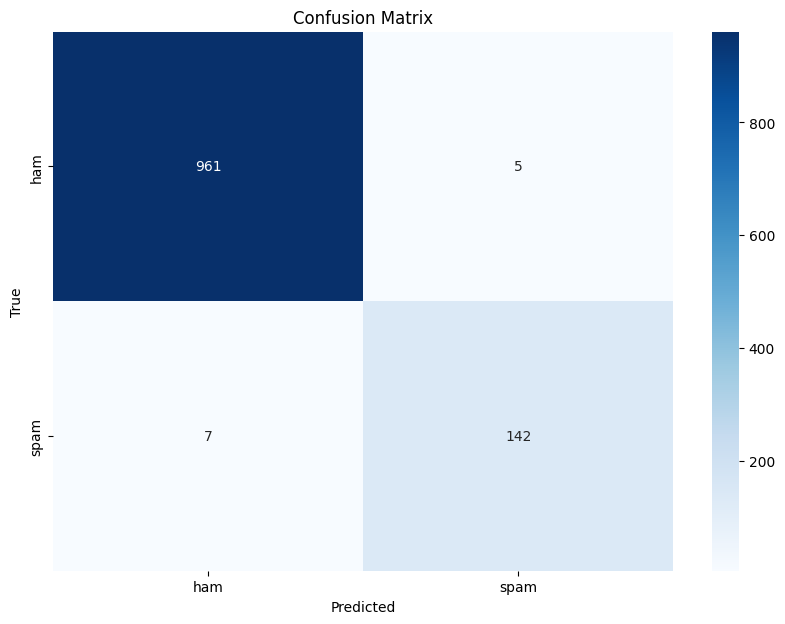

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
